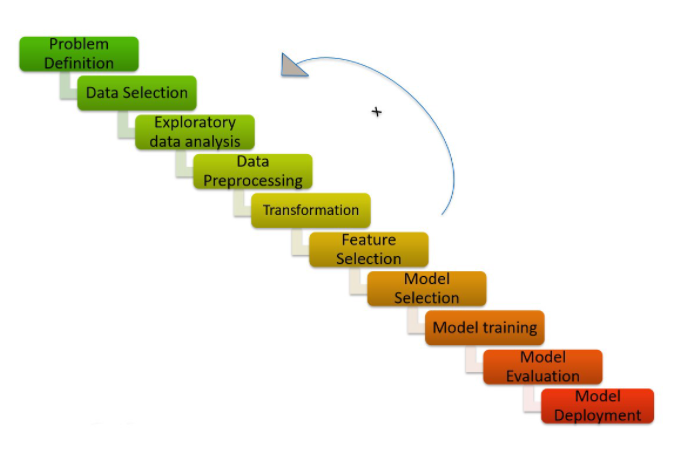 credit : Ignite,TCS

# Problem Statement : To build a model to tell if any person survived the titanic accident or not.

# Data selection : Data is downloaded from kaggle.I have also uploaded it on my github.

# My github link : https://github.com/akshaytheau/Data-Science

# Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np

titanic_data_train = pd.read_csv('train.csv')
titanic_data_train['isTrain'] = 1
titanic_data_test = pd.read_csv('test.csv')
titanic_data_test['isTrain'] = 0

print("Shape of train and test are ",titanic_data_train.shape , " and " , titanic_data_test.shape)

Shape of train and test are  (891, 13)  and  (418, 12)


In [3]:
titanic_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isTrain
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [4]:
print(titanic_data_test.columns ,"#######", titanic_data_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'isTrain'],
      dtype='object') ####### Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isTrain'],
      dtype='object')


In [5]:
titanic_data = pd.concat([titanic_data_train, titanic_data_test],sort=False)
titanic_data.shape

(1309, 13)

In [6]:
if (titanic_data.PassengerId.nunique() == titanic_data.shape[0] ):
    print("All Unique")
else :
    print("Duplicate Ids")

All Unique


In [7]:
print('Train and test sets are distinct.') if len(np.intersect1d(titanic_data_train.PassengerId.values,titanic_data_test.PassengerId.values))== 0 else print('Not Unique')

Train and test sets are distinct.


In [8]:
titanic_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
isTrain           0
dtype: int64

In [9]:
titanic_data.columns
#sibsp Number of Siblings/Spouses Aboard
#parch Number of Parents/Children Aboard

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isTrain'],
      dtype='object')

In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,isTrain
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [11]:
titanic_data[['Pclass','Survived']].groupby('Pclass' , as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
titanic_data[['Sex','Survived']].groupby('Sex' , as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
titanic_data[['SibSp','Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
titanic_data_train.shape

(891, 13)

In [15]:
titanic_data[['Parch','Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


In [16]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data[['FamilySize','Survived']].groupby('FamilySize', as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


# Data preprocessing and transformation

In [17]:
titanic_data['With_Cabin'] = titanic_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [18]:
titanic_data['Embarked'].fillna('S',inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean() , inplace=True)
titanic_data = titanic_data.drop(['Name','Ticket','PassengerId','Cabin'],axis=1)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_mf = le.fit_transform(titanic_data['Sex'])
encoded_mf
titanic_data['Sex'] = encoded_mf

In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
encoded_embarked = lb.fit_transform(titanic_data['Embarked'])
encoded_embarked

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [21]:
embarked_cols = pd.DataFrame(encoded_embarked , columns=['EmbarkedS','EmbarkedC','EmbarkedQ'])

In [23]:
titanic_data.index = range(0,1309,1)
processed_data = pd.concat([titanic_data,embarked_cols] , axis=1)

In [25]:
processed_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isTrain,FamilySize,With_Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
0,0.0,3,1,22.0,1,0,7.2500,S,1,2,0,0,0,1
1,1.0,1,0,38.0,1,0,71.2833,C,1,2,1,1,0,0
2,1.0,3,0,26.0,0,0,7.9250,S,1,1,0,0,0,1
3,1.0,1,0,35.0,1,0,53.1000,S,1,2,1,0,0,1
4,0.0,3,1,35.0,0,0,8.0500,S,1,1,0,0,0,1


In [26]:
processed_data = processed_data.drop(['Embarked'],axis=1)

In [27]:
processed_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isTrain,FamilySize,With_Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
0,0.0,3,1,22.0,1,0,7.2500,1,2,0,0,0,1
1,1.0,1,0,38.0,1,0,71.2833,1,2,1,1,0,0
2,1.0,3,0,26.0,0,0,7.9250,1,1,0,0,0,1
3,1.0,1,0,35.0,1,0,53.1000,1,2,1,0,0,1
4,0.0,3,1,35.0,0,0,8.0500,1,1,0,0,0,1


In [ ]:
processed_data.to_csv('titanic_processed_data.csv')

# Feature selection

In [24]:
titanic_data = pd.read_csv('titanic_processed_data.csv')

titanic_data_train = titanic_data[ titanic_data['isTrain'] == 1]
titanic_data_test = titanic_data[ titanic_data['isTrain'] == 0]

# Model building

In [28]:
X = titanic_data_train.drop(['Survived'],axis=1)
y = titanic_data_train['Survived']
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
X = titanic_data_train.drop(['Survived'],axis=1)
y = titanic_data_train['Survived']
preds = logreg.predict(X)
predp = logreg.predict_proba(X)

# Model evaluation

In [30]:
from sklearn.metrics import accuracy_score , recall_score, precision_score , roc_auc_score
pd.DataFrame(data=[accuracy_score(y, preds), recall_score(y, preds),
                       precision_score(y, preds), roc_auc_score(y, preds)], 
                 index=["accuracy", "recall", "precision", "roc_auc_score"], columns=['Scores'])

,Scores
accuracy,0.801347
recall,0.710526
precision,0.757009
roc_auc_score,0.784225


# Model saving and deployment

In [32]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(logreg, files)

In [33]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [34]:
lr.predict(X)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.